# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [16]:
# your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Task 1: Data into Dataframe

In [9]:
retail_df = pd.read_excel('Retail.xlsx')

In [85]:
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom


In [86]:
retail_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Task 2: Clean Data

In [87]:
clean_retail_df = retail_df.dropna()

In [88]:
clean_retail_df = clean_retail_df.drop_duplicates()

In [89]:
clean_retail_df["Total"] = clean_retail_df.Quantity * clean_retail_df.UnitPrice
clean_retail_df.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,15.300
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom,22.000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340


Task 3: Analysis of the data

In [90]:
pd.set_option('display.float_format', lambda x: '%.3f' %x)
clean_retail_df.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
count,401604.000,401604,401604.000,401604.000,401604.000
mean,12.183,2011-07-10 12:08:23.848567552,3.474,15281.161,20.614
min,-80995.000,2010-12-01 08:26:00,0.000,12346.000,-168469.600
25%,2.000,2011-04-06 15:02:00,1.250,13939.000,4.250
50%,5.000,2011-07-29 15:40:00,1.950,15145.000,11.700
75%,12.000,2011-10-20 11:58:30,3.750,16784.000,19.800
max,80995.000,2011-12-09 12:50:00,38970.000,18287.000,168469.600
std,250.283,NaN,69.764,1714.006,430.352


Text(0.5, 1.0, 'Sales accross time')

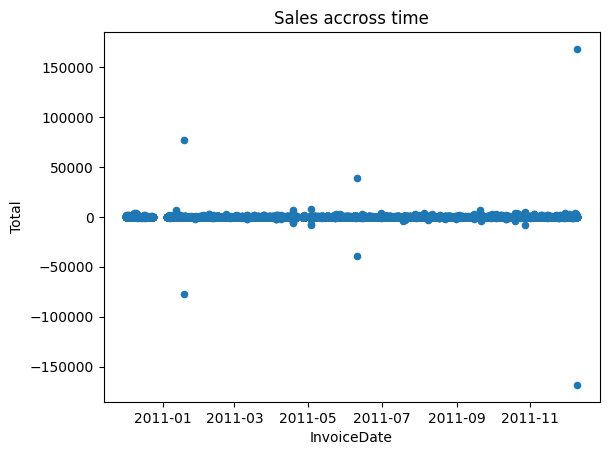

In [91]:
clean_retail_df.plot.scatter(x='InvoiceDate', y='Total')
plt.title("Sales accross time")

Text(0.5, 1.0, 'Income in time')

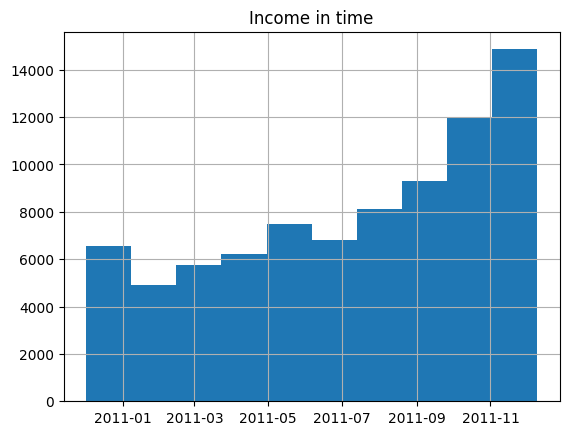

In [92]:
quantity_mean = clean_retail_df.loc[:, 'Total'].mean()
big_sales = clean_retail_df[clean_retail_df['Total'] > quantity_mean]
big_sales.InvoiceDate.hist()
plt.title("Income in time")

In [93]:
print("Different prices: ",clean_retail_df.UnitPrice.nunique())

Different prices:  620


In [94]:
print("Different customers: ",clean_retail_df.CustomerID.nunique())

Different customers:  4372


In [95]:
biggest_sale = clean_retail_df[clean_retail_df['Total'] == clean_retail_df.Total.max()]
biggest_sale.Description


540421    PAPER CRAFT , LITTLE BIRDIE
Name: Description, dtype: object

In [99]:
print("Most saled item")
clean_retail_df.UnitPrice.mode()

Most saled item


0   1.250
Name: UnitPrice, dtype: float64

In [76]:
clean_retail_df.corr(method='pearson', numeric_only=True).style.background_gradient(cmap='viridis')

,Quantity,UnitPrice,CustomerID,Total
Quantity,1.000000,-0.001243,-0.003457,0.916130
UnitPrice,-0.001243,1.000000,-0.004524,-0.129311
CustomerID,-0.003457,-0.004524,1.000000,-0.002130
Total,0.916130,-0.129311,-0.002130,1.000000
